In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.models import Sequential
from keras import regularizers
from keras.activations import relu,linear
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array, load_img

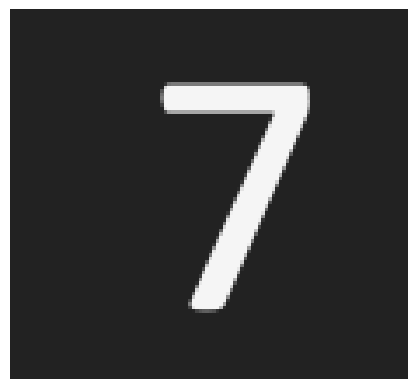

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5784 - accuracy: 0.8981 - val_loss: 0.4681 - val_accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4928 - accuracy: 0.9153 - val_loss: 0.4385 - val_accuracy: 0.9290
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4701 - accuracy: 0.9184 - val_loss: 0.4424 - val_accuracy: 0.9263
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4683 - accuracy: 0.9179 - val_loss: 0.4280 - val_accuracy: 0.9267
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4560 - accuracy: 0.9212 - val_loss: 0.4096 - val_accuracy: 0.9327
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4518 - accuracy: 0.9212 - val_loss: 0.4254 - val_accuracy: 0.9293
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4512 - accuracy: 0.9208 - val_loss: 0.4016 - val_accurac

In [15]:
#ds = tfds.load('mnist', split='train', as_supervised=True, shuffle_files=True)

#Load the training data
train_ds, test_ds = tfds.load('mnist', split=['train', 'test[:30%]'],as_supervised=True, shuffle_files=True)


#load the image
image_path = '../model7.png'

image = load_img(image_path, color_mode='grayscale', target_size=(28, 28))

#process the image
image = img_to_array(image)  # Convert the image to an array
image = image.reshape(1,28, 28, 1)  # Reshape it to (1, 28, 28, 1)
image = image.astype('float32') / 255.0  # Normalize pixel values

# Preprocess the dataset: normalize and convert data type
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize and convert to float32
    return image, label

# Apply preprocessing to the dataset
train_ds = train_ds.map(preprocess)
test_ds = test_ds.map(preprocess)

# Batch and prefetch

train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)


#display the input image

img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()



#displain the

# ds_sample = train_ds.take(1)

# # Plot the images in a 3x3 grid
# fig, axes = plt.subplots(3, 3, figsize=(6, 6))
# fig.subplots_adjust(hspace=0.5, wspace=0.5)

# for i, (image, label) in enumerate(ds_sample):
#     ax = axes[i // 3, i % 3]
#     # Ensure the image is correctly shaped for display
#     img_2d = image.numpy().squeeze()  # Remove extraneous dimensions
#     if img_2d.ndim == 2:  # Check if the image is 2D as expected
#         ax.imshow(img_2d, cmap='gray')
#         ax.set_title(f'Label: {label.numpy()}')
#         ax.axis('off')
#     else:
#         print(f"Unexpected image shape: {img_2d.shape}")

# for images, labels in train_ds.take(100):  # Taking one batch
#     plt.figure(figsize=(10, 10))
#     for i in range(9):  # Assuming you want to display 9 images
#         ax = plt.subplot(3, 3, i + 1)
#         img = images[i].numpy().astype("uint8")  # Access the i-th image in the batch and convert to uint8
#         plt.imshow(img, cmap='gray')
#         plt.title(int(labels[i]))
#         plt.axis("off")



tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28,1)),
        tf.keras.layers.Dense(100, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
        #tf.keras.layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
        tf.keras.layers.Dense(50, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
        tf.keras.layers.Dense(10, activation="linear", kernel_regularizer=regularizers.l2(0.001)),
        #tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    #loss=SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)



model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

model.summary()

test_loss_train = model.evaluate(train_ds)
print(f"Test Loss Train: {test_loss_train}")

test_loss_test = model.evaluate(test_ds)
print(f"Test Loss Test: {test_loss_test}")

prediction = model.predict(image)


print(prediction)

# Interpret the output
predicted_digit = np.argmax(prediction)
print(f"Predicted digit: {predicted_digit}")

